<a href="https://www.kaggle.com/code/cirillafiona/hw1-indian-pine?scriptVersionId=122736177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-pines/Indian_pines_corrected.mat
/kaggle/input/indian-pines/Indian_pines_gt.mat


In [2]:
# # Kaggle运行使用
def LoadData():
    data_path = '../input/'
    data = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_corrected.mat'))['indian_pines_corrected']
    labels = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_gt.mat'))['indian_pines_gt']  
    return data, labels

In [3]:
# # 本地运行使用
# def LoadData():
#     data_path = './data/'
#     data = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_corrected.mat'))['indian_pines_corrected']
#     labels = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_gt.mat'))['indian_pines_gt']

In [4]:
# if __name__ == '__main__':
#     # 读取数据
#     data, label = LoadData()
#     data = data.reshape(-1, 200)
#     label = label.reshape(-1, )
#     # 使用stratify参数可以平衡划分数据集，提高一点精度，这里可以对比运行一下
#     data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.3, random_state=42, stratify=label)
#     rfc = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42, n_jobs=-1)
#     rfc = rfc.fit(data_train, label_train)
#     score_train = rfc.score(data_train, label_train)
#     score_test = rfc.score(data_test, label_test)
#     label_pred = rfc.predict(data_test)
#     print("随机森林：" + "训练集：" + str(score_train) + " 测试集：" + str(score_test))
#     print(classification_report(label_test, label_pred))

In [5]:
if __name__ == '__main__':
    # 读取数据
    data, labels = LoadData()
    # 打印数据和标签的形状
    print(f"Data shape: {data.shape}")
    print(f"Labels shape: {labels.shape}")
    
    X = data.reshape(-1, 200)
    y = labels.reshape(-1, )

    # 将数据分成训练集和测试集，使用stratify参数可以平衡划分数据集，提高一点精度
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

    # 创建一个随机森林分类器
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # 在训练集上训练分类器
    rf.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = rf.predict(X_test)

    # 打印分类报告和混淆矩阵
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Data shape: (145, 145, 200)
Labels shape: (145, 145)
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3233
           1       1.00      0.57      0.73        14
           2       0.81      0.76      0.78       428
           3       0.85      0.68      0.76       249
           4       0.78      0.49      0.60        71
           5       0.95      0.68      0.79       145
           6       0.92      0.71      0.80       219
           7       0.83      0.62      0.71         8
           8       0.91      0.94      0.93       143
           9       0.00      0.00      0.00         6
          10       0.80      0.81      0.80       292
          11       0.80      0.90      0.84       737
          12       0.77      0.61      0.68       178
          13       0.90      0.77      0.83        61
          14       0.68      0.51      0.58       380
          15       0.00      0.00      0.00       116
          16       1.00     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


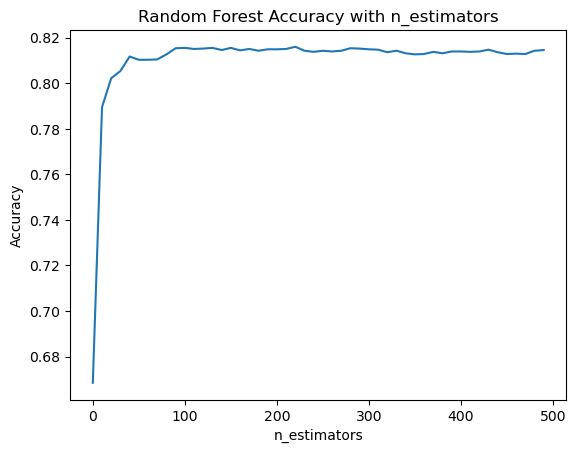

In [6]:
    # 绘制随着n_estimators变化准确率的变化图(很慢)
    accuracies = []
    for n in range(0, 500, 10):
        clf = RandomForestClassifier(n_estimators=n+1, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    plt.plot(range(0, 500, 10), accuracies)
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Accuracy with n_estimators')
    plt.show()

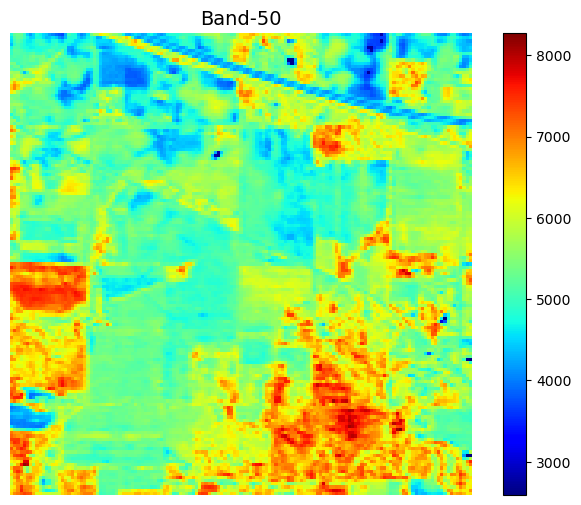

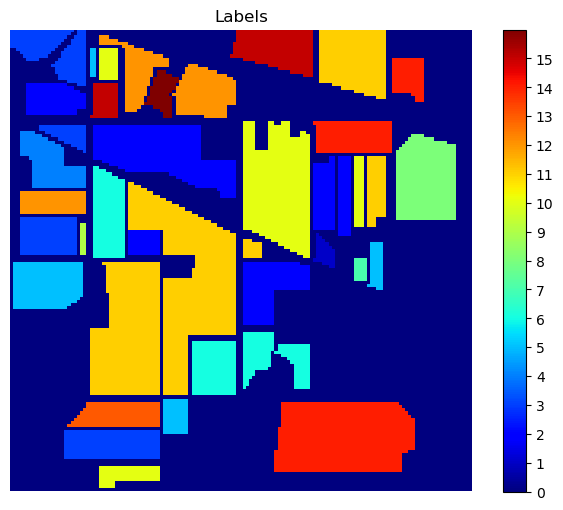

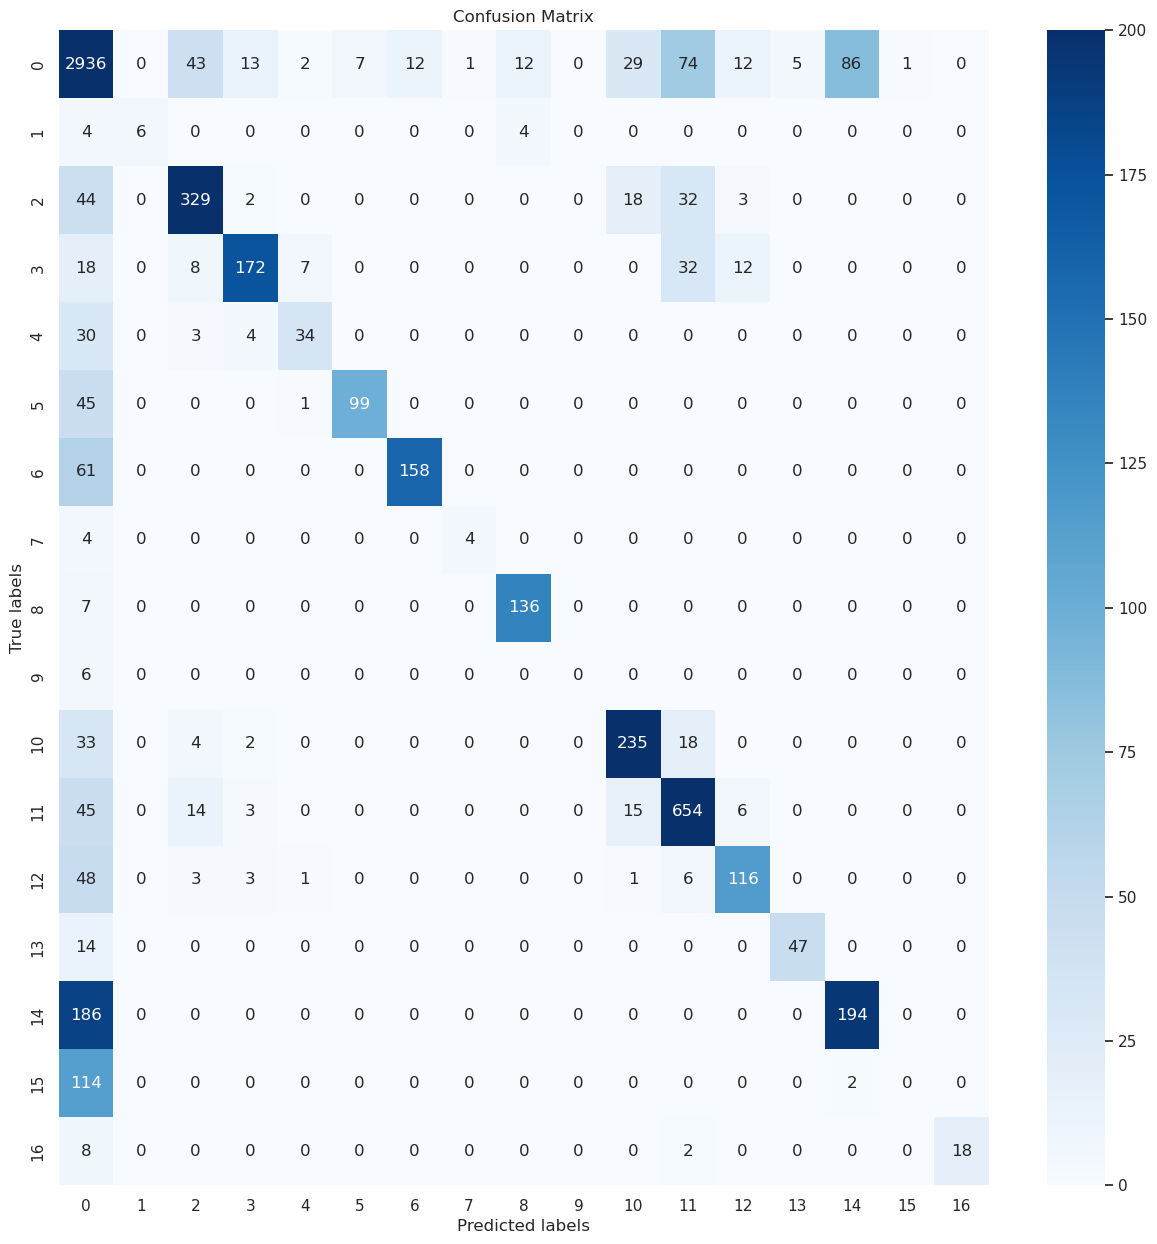

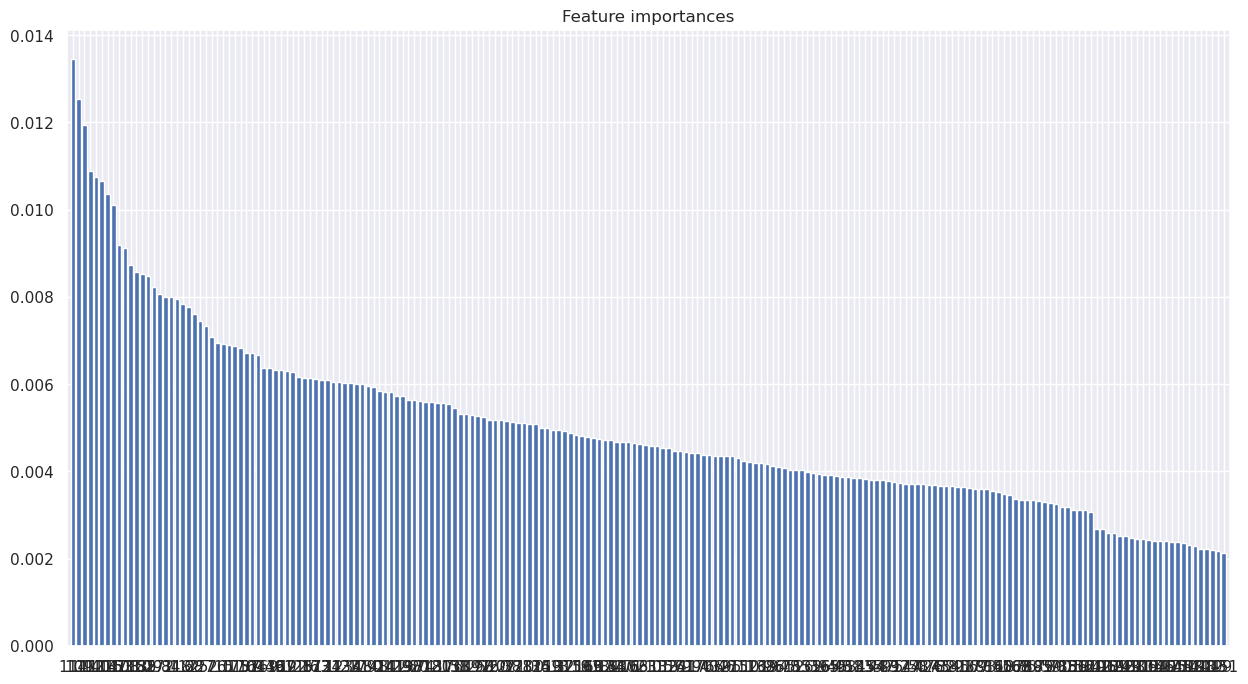

Top 10 important bands:
Band 114: 0.013449707885641073
Band 109: 0.012537763543401336
Band 111: 0.011945341849327712
Band 112: 0.01088718350708274
Band 140: 0.010745428456125548
Band 113: 0.010665782815468932
Band 116: 0.010364342433304998
Band 147: 0.010113804632018058
Band 153: 0.009197698680742595
Band 108: 0.009119458007888805


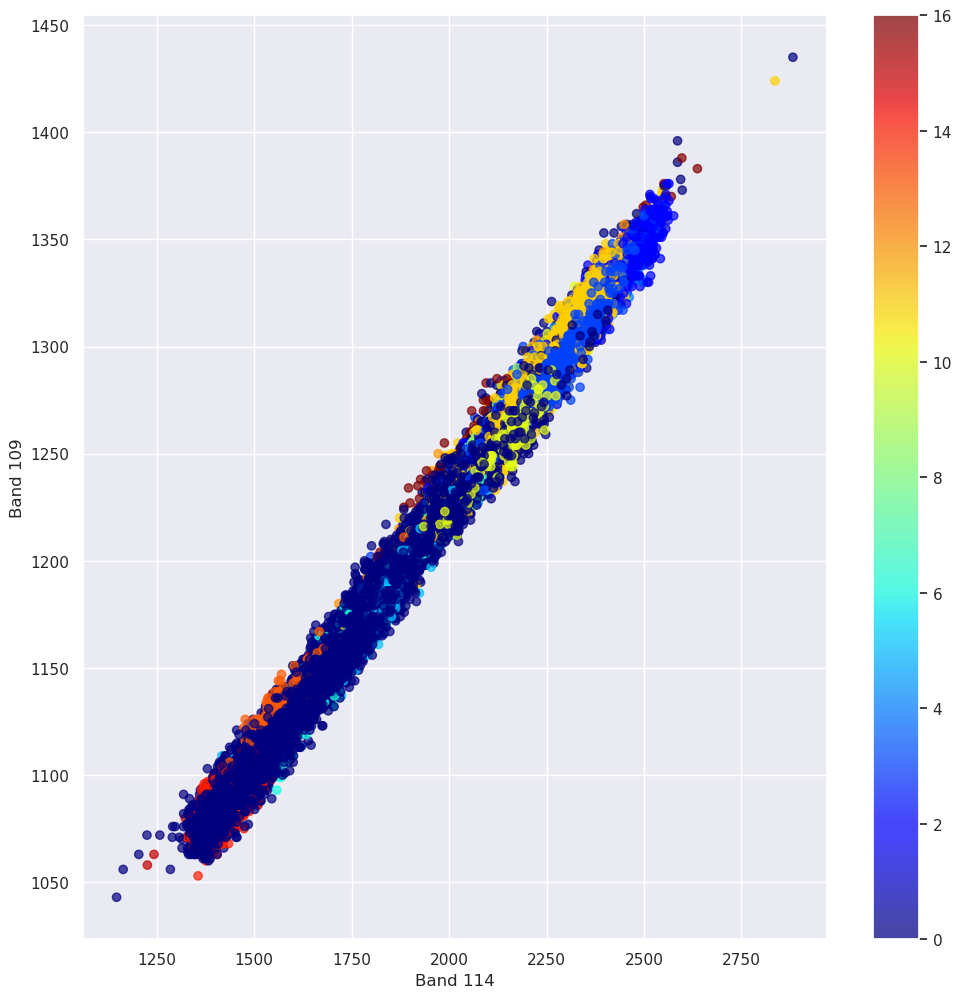

In [7]:
    # 绘制随机波段的特征
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(data.shape[2])
    plt.imshow(data[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
    # 绘制标签
    plt.figure(figsize=(8, 6))
    plt.imshow(labels, cmap='jet')
    plt.axis('off')
    plt.colorbar(ticks= range(0,16))
    plt.title("Labels")
    plt.show()
    
    # 绘制混淆矩阵图
    plt.figure(figsize=(15, 15))
    sns.set(font_scale=1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', vmin=0, vmax=200)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # 可视化每个波段的重要性
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(15, 8))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    # 显示前10个最重要的波段
    print("Top 10 important bands:")
    for i in range(10):
        print(f"Band {indices[i]}: {importances[indices[i]]}")

    # 可视化前两个波段的散点图
    plt.figure(figsize=(12, 12))
    plt.scatter(X[:, indices[0]], X[:, indices[1]], c=y, cmap='jet', alpha=0.7)
    plt.colorbar()
    plt.xlabel(f"Band {indices[0]}")
    plt.ylabel(f"Band {indices[1]}")
    plt.show()

In [8]:
# # 调参，很慢，效果并不好，可以写写
# if __name__ == '__main__':
#     # 读取数据
#     data, labels = LoadData()
#     # 数据预处理
#     data = data.reshape(-1, 200)
#     labels = labels.reshape(-1, )

#     X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

#     # 使用HalvingGridSearchCV进行超参数优化
#     params = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [5, 10, 15],
#         'min_samples_split': [2, 4, 6],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['sqrt', 'log2', None]
#     }
#     clf = RandomForestClassifier()
#     search = HalvingGridSearchCV(estimator=clf,
#                                  param_grid=params,
#                                  scoring='accuracy',
#                                  factor=2,
#                                  min_resources='exhaust',
#                                  max_resources=300,
#                                  verbose=3,
#                                  n_jobs=-1)
#     search.fit(X_train, y_train)

#     # 输出最佳参数和测试集准确率
#     best_params = search.best_params_
#     print('Best parameters:', best_params)
# #####最终优化结果，没有默认的参数优化好 ######
#     # Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
#     # Test accuracy: 0.7668040583386176
#     clf = RandomForestClassifier(**best_params)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print('Test accuracy:', acc)